In [1]:
#load various python libraries

from ipywidgets import *
from IPython.display import HTML
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import collections

from scipy.signal import find_peaks, peak_prominences
from scipy.interpolate import interp1d

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import matplotlib.mlab

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


import csv

plt.style.use('pubplot-paper.mplstyle')

In [2]:
# Global Variables

VG = np.linspace(0, 50, num=21)

wavelength = np.linspace(300, 1100, num=801)


R_matrix_1st = pd.DataFrame(columns=wavelength, index=VG)

R_matrix_2nd = pd.DataFrame(columns=wavelength, index=VG)


Recon_1st = pd.DataFrame(columns=['FESH0750', 'FESH0750_NF633-25'], index=wavelength)

Recon_2nd = pd.DataFrame(columns=['FESH0750', 'FESH0750_NF633-25'], index=wavelength)


### Load data files

In [3]:
Iph_1stGr = pd.read_csv('Iph_1stGr.csv', index_col=0)

Iph_2ndGr = pd.read_csv('Iph_2ndGr.csv', index_col=0)

Iph_1stGr

,FBH400-40,FBH510-10,FBH630-10,FBH700-40,FBH770-10,FESH0500,FESH0750,FESH0750_NF633-25,350nm,550nm,750nm,950nm
0.0,7.908748e-07,6.544637e-07,7.377528e-07,5.424396e-07,7.382204e-07,5.643425e-07,0.000001,9.036323e-07,7.588900e-07,7.272300e-07,6.738000e-07,4.892100e-07
2.5,1.059211e-06,1.017230e-06,1.026086e-06,1.129926e-06,1.015573e-06,1.213817e-06,0.000001,1.112792e-06,1.028500e-06,1.021220e-06,9.501600e-07,7.228500e-07
5.0,1.107489e-06,1.057836e-06,1.075935e-06,1.211434e-06,1.056608e-06,1.241426e-06,0.000001,1.225459e-06,1.059350e-06,1.082070e-06,1.023260e-06,7.634800e-07
7.5,1.130374e-06,1.086343e-06,1.123738e-06,1.261098e-06,1.075395e-06,1.288202e-06,0.000001,1.309899e-06,1.078170e-06,1.113630e-06,1.065940e-06,7.709000e-07
10.0,1.133847e-06,1.111535e-06,1.145368e-06,1.281185e-06,1.082069e-06,1.298377e-06,0.000001,1.425404e-06,1.089780e-06,1.142220e-06,1.096070e-06,7.462700e-07
12.5,1.159869e-06,1.128224e-06,1.156252e-06,1.285595e-06,1.096154e-06,1.329188e-06,0.000001,1.443756e-06,1.095100e-06,1.150600e-06,1.094780e-06,7.017000e-07
15.0,1.173647e-06,1.139742e-06,1.165879e-06,1.288888e-06,1.101820e-06,1.353194e-06,0.000001,1.447889e-06,1.098410e-06,1.141260e-06,1.085870e-06,6.484800e-07
17.5,1.201480e-06,1.152964e-06,1.187580e-06,1.306167e-06,1.110747e-06,1.379022e-06,0.000001,1.550279e-06,1.103240e-06,1.133920e-06,1.064650e-06,5.907000e-07
20.0,1.227025e-06,1.160671e-06,1.203580e-06,1.315581e-06,1.107358e-06,1.402208e-06,0.000001,1.529721e-06,1.086290e-06,1.113790e-06,1.032300e-06,5.469600e-07
22.5,1.240734e-06,1.155151e-06,1.206927e-06,1.324852e-06,1.106610e-06,1.431818e-06,0.000001,1.576182e-06,1.092670e-06,1.090210e-06,9.990800e-07,4.993600e-07


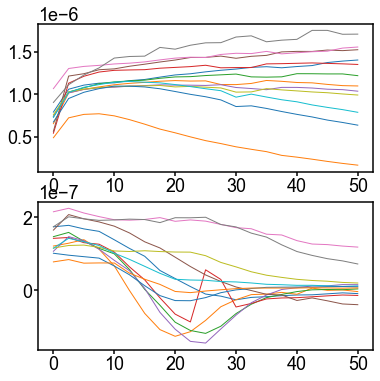

In [4]:
fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

ax1.plot(VG, Iph_1stGr, linewidth = 1, label='');

ax2.plot(VG, Iph_2ndGr, linewidth = 1, label='');

In [5]:
PowerInt_1stGr = pd.read_csv('PowerInt_1stGr.csv', index_col=0)

PowerInt_2ndGr = pd.read_csv('PowerInt_2ndGr.csv', index_col=0)

PowerInt_1stGr


,FBH400-40,FBH510-10,FBH630-10,FBH700-40,FBH770-10,FESH0500,FESH0750,FESH0750_NF633-25,350nm,550nm,750nm,950nm
300.0,7.812958e-09,3.276478e-08,2.454307e-08,3.346050e-08,2.692197e-08,4.309280e-07,1.702110e-06,8.170127e-12,0.0,0.0,0.0,0.0
301.0,7.754375e-09,3.458972e-08,2.295294e-08,3.383506e-08,2.960191e-08,8.330931e-07,2.187355e-06,1.312413e-11,0.0,0.0,0.0,0.0
302.0,5.771434e-09,3.824837e-08,2.203696e-08,3.420917e-08,2.886151e-08,9.084510e-07,1.157747e-06,3.878452e-11,0.0,0.0,0.0,0.0
303.0,5.922288e-09,3.742635e-08,2.702791e-08,3.770143e-08,3.168046e-08,1.096956e-06,2.222336e-06,4.266886e-11,0.0,0.0,0.0,0.0
304.0,6.075038e-09,3.995624e-08,3.091150e-08,4.397862e-08,3.326330e-08,6.748038e-07,9.399317e-07,3.712730e-11,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1096.0,7.379590e-08,3.975130e-07,5.137691e-07,1.627858e-06,3.160307e-07,2.070184e-06,2.008962e-06,6.807470e-07,0.0,0.0,0.0,0.0
1097.0,1.121783e-07,3.669684e-07,6.170139e-07,1.517819e-06,5.681748e-07,1.870020e-06,1.885150e-06,6.537559e-07,0.0,0.0,0.0,0.0
1098.0,6.742435e-08,3.037401e-07,5.215270e-07,1.666493e-06,4.493147e-07,9.871830e-07,1.894250e-06,6.843301e-07,0.0,0.0,0.0,0.0
1099.0,6.947522e-08,3.768801e-07,6.816189e-07,1.608791e-06,5.723364e-07,9.910823e-07,1.725827e-06,6.514948e-07,0.0,0.0,0.0,0.0


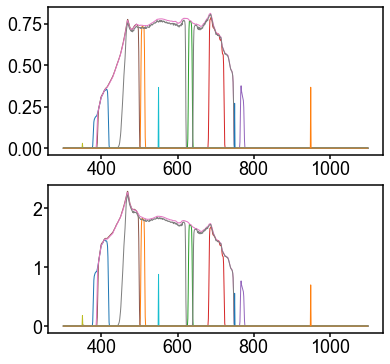

In [6]:
fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

ax1.plot(wavelength, PowerInt_1stGr, linewidth = 1, label='');

ax2.plot(wavelength, PowerInt_2ndGr, linewidth = 1, label='');

### Ridge Regression to find R matrix

In [7]:
train_X = PowerInt_1stGr.drop(['FESH0750', 'FESH0750_NF633-25'], axis=1).T

display(train_X)

train_y_total = Iph_1stGr.drop(['FESH0750', 'FESH0750_NF633-25'], axis=1)

display(train_y_total)

,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,...,1091.0,1092.0,1093.0,1094.0,1095.0,1096.0,1097.0,1098.0,1099.0,1100.0
FBH400-40,7.812958e-09,7.754375e-09,5.771434e-09,5.922288e-09,6.075038e-09,7.222503e-09,7.951826e-09,6.038228e-09,5.856257e-09,6.534771e-09,...,9.009884e-08,1.744280e-07,1.315854e-07,7.622182e-08,7.500916e-08,7.379590e-08,1.121783e-07,6.742435e-08,6.947522e-08,7.152740e-08
FBH510-10,3.276478e-08,3.458972e-08,3.824837e-08,3.742635e-08,3.995624e-08,3.797385e-08,3.447184e-08,3.907526e-08,3.920281e-08,3.615609e-08,...,4.862941e-07,3.758057e-07,3.447181e-07,3.531018e-07,4.684516e-07,3.975130e-07,3.669684e-07,3.037401e-07,3.768801e-07,4.043389e-07
FBH630-10,2.454307e-08,2.295294e-08,2.203696e-08,2.702791e-08,3.091150e-08,3.004279e-08,2.743009e-08,2.613834e-08,2.720746e-08,2.786889e-08,...,6.086512e-07,4.806620e-07,5.246121e-07,4.684633e-07,5.760084e-07,5.137691e-07,6.170139e-07,5.215270e-07,6.816189e-07,6.036923e-07
FBH700-40,3.346050e-08,3.383506e-08,3.420917e-08,3.770143e-08,4.397862e-08,4.834090e-08,4.674049e-08,4.650189e-08,5.200960e-08,5.602617e-08,...,1.842930e-06,1.931390e-06,1.736405e-06,1.730996e-06,1.630216e-06,1.627858e-06,1.517819e-06,1.666493e-06,1.608791e-06,1.715890e-06
FBH770-10,2.692197e-08,2.960191e-08,2.886151e-08,3.168046e-08,3.326330e-08,3.355616e-08,3.384403e-08,3.215692e-08,2.956717e-08,3.094455e-08,...,6.324237e-07,4.024551e-07,5.264518e-07,4.013198e-07,5.886550e-07,3.160307e-07,5.681748e-07,4.493147e-07,5.723364e-07,3.953289e-07
FESH0500,4.309280e-07,8.330931e-07,9.084510e-07,1.096956e-06,6.748038e-07,1.239790e-06,1.772775e-06,8.427848e-07,5.355887e-07,9.546834e-07,...,8.978454e-07,1.062174e-06,1.269490e-06,2.111499e-06,2.182028e-06,2.070184e-06,1.870020e-06,9.871830e-07,9.910823e-07,1.164078e-06
350nm,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
550nm,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
750nm,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
950nm,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


,FBH400-40,FBH510-10,FBH630-10,FBH700-40,FBH770-10,FESH0500,350nm,550nm,750nm,950nm
0.0,7.908748e-07,6.544637e-07,7.377528e-07,5.424396e-07,7.382204e-07,5.643425e-07,7.588900e-07,7.272300e-07,6.738000e-07,4.892100e-07
2.5,1.059211e-06,1.017230e-06,1.026086e-06,1.129926e-06,1.015573e-06,1.213817e-06,1.028500e-06,1.021220e-06,9.501600e-07,7.228500e-07
5.0,1.107489e-06,1.057836e-06,1.075935e-06,1.211434e-06,1.056608e-06,1.241426e-06,1.059350e-06,1.082070e-06,1.023260e-06,7.634800e-07
7.5,1.130374e-06,1.086343e-06,1.123738e-06,1.261098e-06,1.075395e-06,1.288202e-06,1.078170e-06,1.113630e-06,1.065940e-06,7.709000e-07
10.0,1.133847e-06,1.111535e-06,1.145368e-06,1.281185e-06,1.082069e-06,1.298377e-06,1.089780e-06,1.142220e-06,1.096070e-06,7.462700e-07
12.5,1.159869e-06,1.128224e-06,1.156252e-06,1.285595e-06,1.096154e-06,1.329188e-06,1.095100e-06,1.150600e-06,1.094780e-06,7.017000e-07
15.0,1.173647e-06,1.139742e-06,1.165879e-06,1.288888e-06,1.101820e-06,1.353194e-06,1.098410e-06,1.141260e-06,1.085870e-06,6.484800e-07
17.5,1.201480e-06,1.152964e-06,1.187580e-06,1.306167e-06,1.110747e-06,1.379022e-06,1.103240e-06,1.133920e-06,1.064650e-06,5.907000e-07
20.0,1.227025e-06,1.160671e-06,1.203580e-06,1.315581e-06,1.107358e-06,1.402208e-06,1.086290e-06,1.113790e-06,1.032300e-06,5.469600e-07
22.5,1.240734e-06,1.155151e-06,1.206927e-06,1.324852e-06,1.106610e-06,1.431818e-06,1.092670e-06,1.090210e-06,9.990800e-07,4.993600e-07


The MSE score for the best Ridge model is 0.00000000000000001436


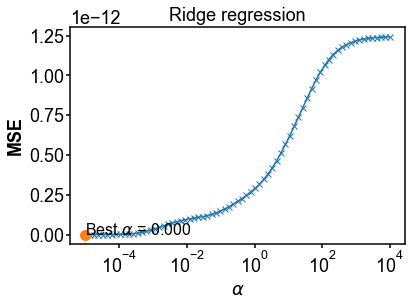

In [8]:
# Plot one particular Ridge result
# initialize alphas and cv_results
cv_results = []
alphas = np.logspace(-5, 4, num=71)
train_y = train_y_total.iloc[15, :]
    
#print(train_y)
# for each alpha, the training dataset is fitted to ridge regression and the cv_scores are calculated and stored in cv_results
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000, fit_intercept=False)
    #ridge.fit(norm_train_X, train_y)
    y_pred_train = ridge.fit(train_X, train_y).predict(train_X)
    #print(y_pred_train)
    scores = mean_squared_error(train_y, y_pred_train)
    #print(scores)
    #scores = cross_validate(ridge, norm_train_X, train_y, cv=kfold, scoring="neg_mean_squared_error")
    #cv_results.append([alpha, scores] + list(ridge.coef_))
    cv_results.append([alpha, scores])
    #print(cv_results)

# cv_results is converted to a pandas dataframe with columns for alpha, score, and the coefficients for each feature
#cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + wavelength)
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"])

print('The MSE score for the best Ridge model is %0.20f' % (cv_results['score'].min()))

# Plot the mse scores vs. alphs and locate the alpha with the minimum score
f, ax = plt.subplots(figsize=(6, 4))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")

plt.xscale(r"log")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);
plt.plot(best_alpha, cv_results["score"].min(), marker="o", markersize=10);

#plt.savefig(r'RidgeRegression_Vg0V.png', dpi=300, bbox_inches='tight')


In [9]:
# Construct train_X and train_y
#train_X = SS_PowerInt
alphas = np.logspace(-7, 4, num=71)

for n in VG:
    train_y = train_y_total.loc[n, :]
    #print(train_y)
    
    cv_results = []

    # for each alpha, the training dataset is fitted to ridge regression and the 
    # cv_scores are calculated and stored in cv_results
    for alpha in alphas:
        ridge = linear_model.Ridge(alpha=alpha, max_iter=10000, fit_intercept=False)
        y_pred_train = ridge.fit(train_X, train_y).predict(train_X)
        scores = mean_squared_error(train_y, y_pred_train)
        cv_results.append([alpha, scores])
        
    cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"])
    best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
    ridge = linear_model.Ridge(alpha=best_alpha, max_iter=10000, fit_intercept=False)
    ridge.fit(train_X, train_y)
    R_matrix_1st.loc[n, :] = ridge.coef_
    #print(ridge.coef_)
    #print(R_matrix)

# Cannot normalize X when there are only two rows (no std can be calculated)


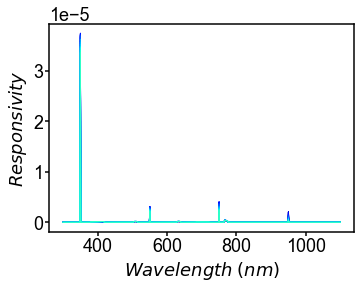

In [10]:

import matplotlib.pylab as pl
colors = pl.cm.jet(np.linspace(0,1,50))

fig,ax1 = plt.subplots(figsize=(5,4))

for idx, n in enumerate(VG):
    label = 'VG = ' + str(n)
    ax1.plot(wavelength, R_matrix_1st.loc[n, :], linewidth = 1, label=label, color=colors[idx]);

#ax1.plot(wavelength, SS_PowerInt.loc['1stGr', :], linewidth = 1, label='1st Gr', color='rosybrown');

#ax1.set_xlim(300, 1300);

fig.tight_layout()

ax1.set_ylabel(r'$Responsivity$');
#ax2.tick_params(axis='y', colors='red')


ax1.set_xlabel(r'$Wavelength$ $(nm)$');
#ax1.tick_params(axis='y', colors='blue')
#ax4.set_ylabel(r'$I_{SD}$ $(\mu A)$');

#ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
#ax2.legend(loc='upper right',bbox_to_anchor=(1.95, 0.75))

x=[0, 10, 20, 30, 40]
labels = [str(i) for i in x]
#ax[0].set_xticks(x);
#ax[0].set_xticklabels([]);

y=[0, 0.25, 0.5, 0.75, 1.0]
labels = [0, '' , 0.5, '', 1.0]
#ax1.set_yticks(y);
#ax1.set_yticklabels(labels);

#plt.savefig(r'R_matrix.png', dpi=300, bbox_inches='tight')


In [11]:
R_matrix_1st*1e9

,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,...,1091.0,1092.0,1093.0,1094.0,1095.0,1096.0,1097.0,1098.0,1099.0,1100.0
0.0,0.000028,0.000028,0.000027,0.000028,0.000033,0.00003,0.000026,0.000031,0.000031,0.000029,...,0.000705,0.000519,0.000598,0.000475,0.000645,0.000419,0.00063,0.000516,0.000641,0.000501
2.5,0.000047,0.000052,0.000052,0.000057,0.000058,0.000061,0.000063,0.000056,0.000053,0.000056,...,0.001031,0.000776,0.000884,0.000728,0.000964,0.000649,0.000933,0.000766,0.000939,0.000751
5.0,0.000049,0.000054,0.000053,0.000058,0.00006,0.000063,0.000065,0.000058,0.000054,0.000058,...,0.001077,0.000811,0.000923,0.00076,0.001005,0.000677,0.000974,0.0008,0.00098,0.000784
7.5,0.00005,0.000055,0.000055,0.00006,0.000061,0.000065,0.000067,0.00006,0.000056,0.00006,...,0.001103,0.000833,0.000946,0.000781,0.001031,0.000697,0.000999,0.000821,0.001005,0.000806
10.0,0.000051,0.000056,0.000056,0.000061,0.000062,0.000066,0.000068,0.000061,0.000057,0.000061,...,0.001115,0.000842,0.000956,0.00079,0.001042,0.000705,0.001009,0.00083,0.001016,0.000815
12.5,0.000051,0.000057,0.000056,0.000062,0.000063,0.000067,0.000069,0.000062,0.000057,0.000062,...,0.001128,0.000852,0.000968,0.000799,0.001055,0.000714,0.001022,0.00084,0.001028,0.000825
15.0,0.000052,0.000057,0.000057,0.000063,0.000064,0.000068,0.00007,0.000062,0.000058,0.000062,...,0.001135,0.000857,0.000974,0.000805,0.001062,0.000719,0.001028,0.000845,0.001034,0.00083
17.5,0.000052,0.000058,0.000058,0.000063,0.000064,0.000068,0.000071,0.000063,0.000059,0.000063,...,0.001148,0.000867,0.000984,0.000813,0.001073,0.000727,0.00104,0.000854,0.001045,0.00084
20.0,0.000052,0.000058,0.000058,0.000063,0.000064,0.000069,0.000071,0.000063,0.000059,0.000063,...,0.00115,0.00087,0.000987,0.000816,0.001075,0.00073,0.001042,0.000856,0.001047,0.000842
22.5,0.000053,0.000059,0.000058,0.000064,0.000065,0.000069,0.000072,0.000064,0.000059,0.000064,...,0.001151,0.000872,0.000988,0.000817,0.001077,0.000731,0.001043,0.000857,0.001049,0.000844


In [12]:
train_X = PowerInt_2ndGr.drop(['FESH0750', 'FESH0750_NF633-25'], axis=1).T

display(train_X)

train_y_total = Iph_2ndGr.drop(['FESH0750', 'FESH0750_NF633-25'], axis=1)

display(train_y_total)

,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,...,1091.0,1092.0,1093.0,1094.0,1095.0,1096.0,1097.0,1098.0,1099.0,1100.0
FBH400-40,7.463645e-08,7.326167e-08,5.393377e-08,5.474761e-08,5.556144e-08,6.535976e-08,7.120917e-08,5.351460e-08,5.137157e-08,5.674379e-08,...,1.649253e-07,3.192103e-07,2.407473e-07,1.394202e-07,1.371682e-07,1.349162e-07,2.050377e-07,1.232065e-07,1.269132e-07,1.306198e-07
FBH510-10,3.129989e-07,3.267962e-07,3.574292e-07,3.459817e-07,3.654341e-07,3.436428e-07,3.086978e-07,3.463097e-07,3.438903e-07,3.139564e-07,...,8.901579e-07,6.877397e-07,6.306925e-07,6.458717e-07,8.566509e-07,7.267470e-07,6.707390e-07,5.550335e-07,6.884620e-07,7.383837e-07
FBH630-10,2.344577e-07,2.168544e-07,2.059343e-07,2.498550e-07,2.827122e-07,2.718710e-07,2.456385e-07,2.316545e-07,2.386661e-07,2.419957e-07,...,1.114132e-06,8.796310e-07,9.598245e-07,8.568838e-07,1.053338e-06,9.392905e-07,1.127768e-06,9.530021e-07,1.245141e-06,1.102433e-06
FBH700-40,3.196450e-07,3.196664e-07,3.196830e-07,3.485246e-07,4.022223e-07,4.374591e-07,4.185644e-07,4.121292e-07,4.562325e-07,4.864956e-07,...,3.373469e-06,3.534522e-06,3.176906e-06,3.166229e-06,2.981153e-06,2.976106e-06,2.774246e-06,3.045233e-06,2.938844e-06,3.133473e-06
FBH770-10,2.571831e-07,2.796724e-07,2.697094e-07,2.928647e-07,3.042215e-07,3.036652e-07,3.030758e-07,2.849949e-07,2.593657e-07,2.687028e-07,...,1.157647e-06,7.365092e-07,9.631903e-07,7.340690e-07,1.076465e-06,5.777784e-07,1.038501e-06,8.210463e-07,1.045510e-06,7.219301e-07
FESH0500,4.116614e-06,7.870885e-06,8.489431e-06,1.014063e-05,6.171660e-06,1.121943e-05,1.587533e-05,7.469292e-06,4.698228e-06,8.289863e-06,...,1.643499e-06,1.943822e-06,2.322644e-06,3.862222e-06,3.990244e-06,3.784783e-06,3.417993e-06,1.803909e-06,1.810450e-06,2.125781e-06
350nm,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
550nm,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
750nm,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
950nm,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


,FBH400-40,FBH510-10,FBH630-10,FBH700-40,FBH770-10,FESH0500,350nm,550nm,750nm,950nm
0.0,1.738017e-07,1.210173e-07,1.467536e-07,1.421254e-07,1.067231e-07,1.647313e-07,1.156280e-07,1.150280e-07,1.012670e-07,7.758900e-08
2.5,1.777743e-07,1.288122e-07,1.584272e-07,1.445089e-07,1.468602e-07,2.073124e-07,1.225460e-07,1.422320e-07,9.594200e-08,8.395100e-08
5.0,1.680571e-07,1.384731e-07,1.341290e-07,1.302370e-07,1.358813e-07,1.957339e-07,1.236440e-07,1.327230e-07,9.187900e-08,7.411300e-08
7.5,1.612948e-07,1.125623e-07,1.146546e-07,1.260525e-07,1.124398e-07,1.872078e-07,1.174220e-07,1.224500e-07,8.791100e-08,7.472100e-08
10.0,1.382146e-07,6.655224e-08,9.966990e-08,1.045585e-07,8.179260e-08,1.755651e-07,1.076080e-07,1.014630e-07,6.630400e-08,7.454400e-08
12.5,1.144694e-07,-1.012516e-09,5.654523e-08,6.394913e-08,5.336181e-08,1.569077e-07,1.060640e-07,8.444000e-08,4.217200e-08,4.669900e-08
15.0,9.291544e-08,-6.371012e-08,2.138714e-09,2.827177e-08,4.831625e-09,1.326048e-07,1.081100e-07,6.539900e-08,1.220200e-08,2.997500e-08
17.5,5.401797e-08,-1.081284e-07,-4.130163e-08,-2.099103e-08,-6.083374e-08,1.157958e-07,1.059110e-07,4.624100e-08,-1.486200e-08,1.586600e-08
20.0,3.192310e-08,-1.264633e-07,-8.782891e-08,-6.565801e-08,-1.070118e-07,9.045050e-08,1.046170e-07,2.991300e-08,-2.850000e-08,-3.509000e-09
22.5,9.983189e-09,-1.138695e-07,-1.105334e-07,-8.712723e-08,-1.403641e-07,6.485817e-08,1.043250e-07,2.789500e-08,-2.890200e-08,-6.688000e-09


The MSE score for the best Ridge model is 0.00000000000000000000


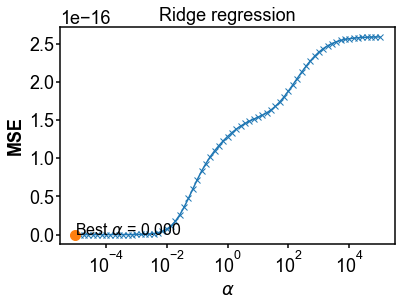

In [13]:
# Plot one particular Ridge result
# initialize alphas and cv_results
cv_results = []
alphas = np.logspace(-5, 5, num=71)
train_y = train_y_total.iloc[15, :]
    
#print(train_y)
# for each alpha, the training dataset is fitted to ridge regression and the cv_scores are calculated and stored in cv_results
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000, fit_intercept=False)
    #ridge.fit(norm_train_X, train_y)
    y_pred_train = ridge.fit(train_X, train_y).predict(train_X)
    #print(y_pred_train)
    scores = mean_squared_error(train_y, y_pred_train)
    #print(scores)
    #scores = cross_validate(ridge, norm_train_X, train_y, cv=kfold, scoring="neg_mean_squared_error")
    #cv_results.append([alpha, scores] + list(ridge.coef_))
    cv_results.append([alpha, scores])
    #print(cv_results)

# cv_results is converted to a pandas dataframe with columns for alpha, score, and the coefficients for each feature
#cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + wavelength)
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"])

print('The MSE score for the best Ridge model is %0.20f' % (cv_results['score'].min()))

# Plot the mse scores vs. alphs and locate the alpha with the minimum score
f, ax = plt.subplots(figsize=(6, 4))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")

plt.xscale(r"log")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);
plt.plot(best_alpha, cv_results["score"].min(), marker="o", markersize=10);

#plt.savefig(r'RidgeRegression_Vg0V.png', dpi=300, bbox_inches='tight')


In [14]:
# Construct train_X and train_y
#train_X = SS_PowerInt
alphas = np.logspace(-7, 4, num=71)

for n in VG:
    train_y = train_y_total.loc[n, :]
    #print(train_y)
    
    cv_results = []

    # for each alpha, the training dataset is fitted to ridge regression and the 
    # cv_scores are calculated and stored in cv_results
    for alpha in alphas:
        ridge = linear_model.Ridge(alpha=alpha, max_iter=10000, fit_intercept=False)
        y_pred_train = ridge.fit(train_X, train_y).predict(train_X)
        scores = mean_squared_error(train_y, y_pred_train)
        cv_results.append([alpha, scores])
        
    cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"])
    best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
    ridge = linear_model.Ridge(alpha=best_alpha, max_iter=10000, fit_intercept=False)
    ridge.fit(train_X, train_y)
    R_matrix_2nd.loc[n, :] = ridge.coef_
    #print(ridge.coef_)
    #print(R_matrix)

# Cannot normalize X when there are only two rows (no std can be calculated)


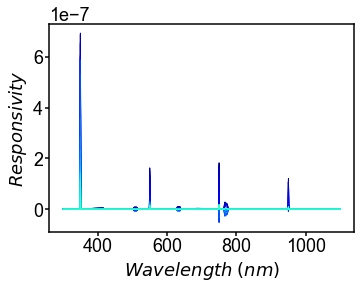

In [15]:

import matplotlib.pylab as pl
colors = pl.cm.jet(np.linspace(0,1,50))

fig,ax1 = plt.subplots(figsize=(5,4))

for idx, n in enumerate(VG):
    label = 'VG = ' + str(n)
    ax1.plot(wavelength, R_matrix_2nd.loc[n, :], linewidth = 1, label=label, color=colors[idx]);

#ax1.plot(wavelength, SS_PowerInt.loc['1stGr', :], linewidth = 1, label='1st Gr', color='rosybrown');

#ax1.set_xlim(300, 1300);

fig.tight_layout()

ax1.set_ylabel(r'$Responsivity$');
#ax2.tick_params(axis='y', colors='red')


ax1.set_xlabel(r'$Wavelength$ $(nm)$');
#ax1.tick_params(axis='y', colors='blue')
#ax4.set_ylabel(r'$I_{SD}$ $(\mu A)$');

#ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
#ax2.legend(loc='upper right',bbox_to_anchor=(1.95, 0.75))

x=[0, 10, 20, 30, 40]
labels = [str(i) for i in x]
#ax[0].set_xticks(x);
#ax[0].set_xticklabels([]);

y=[0, 0.25, 0.5, 0.75, 1.0]
labels = [0, '' , 0.5, '', 1.0]
#ax1.set_yticks(y);
#ax1.set_yticklabels(labels);

#plt.savefig(r'R_matrix.png', dpi=300, bbox_inches='tight')


### Reconstruct Spectrum

The MSE score for the best Ridge model is 0.00000000000000004941


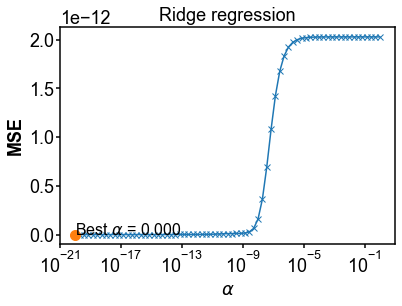

In [16]:
# Plot one the Ridge regression fitting for the test matrices
# initialize alphas and cv_results
test_X = R_matrix_1st
test_y = Iph_1stGr['FESH0750']

cv_results = []
alphas = np.logspace(-20, 0, num=71)

# for each alpha, the training dataset is fitted to ridge regression and the cv_scores are calculated and stored in cv_results
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000, fit_intercept=False)

    y_pred_test = ridge.fit(test_X, test_y).predict(test_X)

    scores = mean_squared_error(test_y, y_pred_test)
    #print(scores)
    #scores = cross_validate(ridge, norm_train_X, train_y, cv=kfold, scoring="neg_mean_squared_error")
    #cv_results.append([alpha, scores] + list(ridge.coef_))
    cv_results.append([alpha, scores])
    #print(cv_results)

# cv_results is converted to a pandas dataframe with columns for alpha, score, and the coefficients for each feature
#cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + wavelength)
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"])

print('The MSE score for the best Ridge model is %0.20f' % (cv_results['score'].min()))

# Plot the mse scores vs. alphs and locate the alpha with the minimum score
f, ax = plt.subplots(figsize=(6, 4))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")

plt.xscale(r"log")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);
plt.plot(best_alpha, cv_results["score"].min(), marker="o", markersize=10);

#plt.savefig(r'RidgeRegression_Vg0V.png', dpi=300, bbox_inches='tight')

ridge = linear_model.Ridge(alpha=best_alpha, max_iter=10000, fit_intercept=False)
ridge.fit(test_X, test_y)

Recon_1st['FESH0750'] = ridge.coef_

The MSE score for the best Ridge model is 0.00000000000000002206


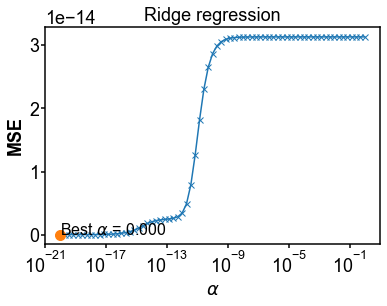

In [17]:
# Plot one the Ridge regression fitting for the test matrices
# initialize alphas and cv_results
test_X = R_matrix_2nd
test_y = Iph_2ndGr['FESH0750']

cv_results = []
alphas = np.logspace(-20, 0, num=71)

# for each alpha, the training dataset is fitted to ridge regression and the cv_scores are calculated and stored in cv_results
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000, fit_intercept=False)

    y_pred_test = ridge.fit(test_X, test_y).predict(test_X)

    scores = mean_squared_error(test_y, y_pred_test)
    #print(scores)
    #scores = cross_validate(ridge, norm_train_X, train_y, cv=kfold, scoring="neg_mean_squared_error")
    #cv_results.append([alpha, scores] + list(ridge.coef_))
    cv_results.append([alpha, scores])
    #print(cv_results)

# cv_results is converted to a pandas dataframe with columns for alpha, score, and the coefficients for each feature
#cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + wavelength)
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"])

print('The MSE score for the best Ridge model is %0.20f' % (cv_results['score'].min()))

# Plot the mse scores vs. alphs and locate the alpha with the minimum score
f, ax = plt.subplots(figsize=(6, 4))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")

plt.xscale(r"log")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);
plt.plot(best_alpha, cv_results["score"].min(), marker="o", markersize=10);

#plt.savefig(r'RidgeRegression_Vg0V.png', dpi=300, bbox_inches='tight')

ridge = linear_model.Ridge(alpha=best_alpha, max_iter=10000, fit_intercept=False)
ridge.fit(test_X, test_y)

Recon_2nd['FESH0750'] = ridge.coef_

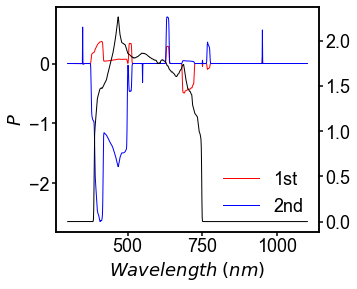

In [18]:


fig,ax1 = plt.subplots(figsize=(5,4))

ax2 = ax1.twinx()

ax1.plot(wavelength, Recon_1st['FESH0750'] , linewidth = 1, label='1st', color='red');
ax1.plot(wavelength, Recon_2nd['FESH0750'] , linewidth = 1, label='2nd', color='blue');

#ax1.plot(wavelength, (Recon_1st['FESH0750']+Recon_2nd['FESH0750'])/2, linewidth = 1, label='P', color='green');

ax2.plot(wavelength, PowerInt_2ndGr['FESH0750'], linewidth = 1, label='P', color='black');


#ax1.plot(wavelength, SS_PowerInt.loc['1stGr', :], linewidth = 1, label='1st Gr', color='rosybrown');

#ax1.set_xlim(300, 1300);

fig.tight_layout()

ax1.set_ylabel(r'$P$');
#ax2.tick_params(axis='y', colors='red')


ax1.set_xlabel(r'$Wavelength$ $(nm)$');
#ax1.tick_params(axis='y', colors='blue')
#ax4.set_ylabel(r'$I_{SD}$ $(\mu A)$');

ax1.legend(loc='lower right')
#ax2.legend(loc='upper right',bbox_to_anchor=(1.95, 0.75))

x=[0, 10, 20, 30, 40]
labels = [str(i) for i in x]
#ax[0].set_xticks(x);
#ax[0].set_xticklabels([]);

y=[0, 0.25, 0.5, 0.75, 1.0]
labels = [0, '' , 0.5, '', 1.0]
#ax1.set_yticks(y);
#ax1.set_yticklabels(labels);

plt.savefig(r'Reconstructed_FESH0750.png', dpi=300, bbox_inches='tight')


The MSE score for the best Ridge model is 0.00000000000000065415


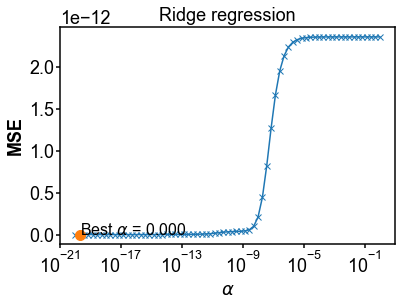

In [19]:
# Plot one the Ridge regression fitting for the test matrices
# initialize alphas and cv_results
test_X = R_matrix_1st
test_y = Iph_1stGr['FESH0750_NF633-25']

cv_results = []
alphas = np.logspace(-20, 0, num=71)

# for each alpha, the training dataset is fitted to ridge regression and the cv_scores are calculated and stored in cv_results
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000, fit_intercept=False)

    y_pred_test = ridge.fit(test_X, test_y).predict(test_X)

    scores = mean_squared_error(test_y, y_pred_test)
    #print(scores)
    #scores = cross_validate(ridge, norm_train_X, train_y, cv=kfold, scoring="neg_mean_squared_error")
    #cv_results.append([alpha, scores] + list(ridge.coef_))
    cv_results.append([alpha, scores])
    #print(cv_results)

# cv_results is converted to a pandas dataframe with columns for alpha, score, and the coefficients for each feature
#cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + wavelength)
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"])

print('The MSE score for the best Ridge model is %0.20f' % (cv_results['score'].min()))

# Plot the mse scores vs. alphs and locate the alpha with the minimum score
f, ax = plt.subplots(figsize=(6, 4))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")

plt.xscale(r"log")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);
plt.plot(best_alpha, cv_results["score"].min(), marker="o", markersize=10);

#plt.savefig(r'RidgeRegression_Vg0V.png', dpi=300, bbox_inches='tight')

ridge = linear_model.Ridge(alpha=best_alpha, max_iter=10000, fit_intercept=False)
ridge.fit(test_X, test_y)

Recon_1st['FESH0750_NF633-25'] = ridge.coef_

The MSE score for the best Ridge model is 0.00000000000000002449


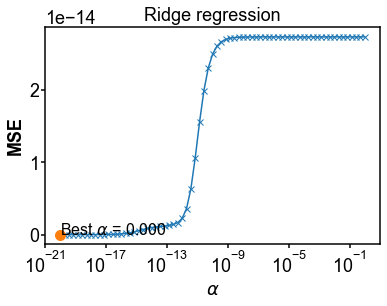

In [20]:
# Plot one the Ridge regression fitting for the test matrices
# initialize alphas and cv_results
test_X = R_matrix_2nd
test_y = Iph_2ndGr['FESH0750_NF633-25']

cv_results = []
alphas = np.logspace(-20, 0, num=71)

# for each alpha, the training dataset is fitted to ridge regression and the cv_scores are calculated and stored in cv_results
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, max_iter=10000, fit_intercept=False)

    y_pred_test = ridge.fit(test_X, test_y).predict(test_X)

    scores = mean_squared_error(test_y, y_pred_test)
    #print(scores)
    #scores = cross_validate(ridge, norm_train_X, train_y, cv=kfold, scoring="neg_mean_squared_error")
    #cv_results.append([alpha, scores] + list(ridge.coef_))
    cv_results.append([alpha, scores])
    #print(cv_results)

# cv_results is converted to a pandas dataframe with columns for alpha, score, and the coefficients for each feature
#cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + wavelength)
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"])

print('The MSE score for the best Ridge model is %0.20f' % (cv_results['score'].min()))

# Plot the mse scores vs. alphs and locate the alpha with the minimum score
f, ax = plt.subplots(figsize=(6, 4))
plt.plot(cv_results["alpha"], cv_results["score"], "-x")

plt.xscale(r"log")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"MSE")
plt.title(r"Ridge regression")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);
plt.plot(best_alpha, cv_results["score"].min(), marker="o", markersize=10);

#plt.savefig(r'RidgeRegression_Vg0V.png', dpi=300, bbox_inches='tight')

ridge = linear_model.Ridge(alpha=best_alpha, max_iter=10000, fit_intercept=False)
ridge.fit(test_X, test_y)

Recon_2nd['FESH0750_NF633-25'] = ridge.coef_

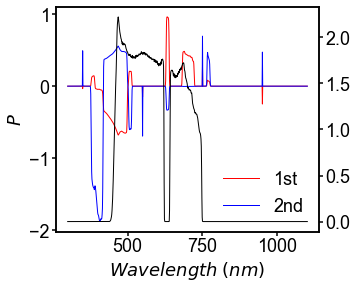

In [21]:


fig,ax1 = plt.subplots(figsize=(5,4))

ax2 = ax1.twinx()

ax1.plot(wavelength, Recon_1st['FESH0750_NF633-25'] , linewidth = 1, label='1st', color='red');
ax1.plot(wavelength, Recon_2nd['FESH0750_NF633-25'] , linewidth = 1, label='2nd', color='blue');
#ax1.plot(wavelength, (Recon_1st['FESH0750_NF633-25']+Recon_2nd['FESH0750_NF633-25'])/2, linewidth = 1, label='P', color='green');


ax2.plot(wavelength, PowerInt_2ndGr['FESH0750_NF633-25'], linewidth = 1, label='P', color='black');


#ax1.plot(wavelength, SS_PowerInt.loc['1stGr', :], linewidth = 1, label='1st Gr', color='rosybrown');

#ax1.set_xlim(300, 1300);

fig.tight_layout()

ax1.set_ylabel(r'$P$');
#ax2.tick_params(axis='y', colors='red')


ax1.set_xlabel(r'$Wavelength$ $(nm)$');
#ax1.tick_params(axis='y', colors='blue')
#ax4.set_ylabel(r'$I_{SD}$ $(\mu A)$');

ax1.legend(loc='lower right')
#ax2.legend(loc='upper right',bbox_to_anchor=(1.95, 0.75))

x=[0, 10, 20, 30, 40]
labels = [str(i) for i in x]
#ax[0].set_xticks(x);
#ax[0].set_xticklabels([]);

y=[0, 0.25, 0.5, 0.75, 1.0]
labels = [0, '' , 0.5, '', 1.0]
#ax1.set_yticks(y);
#ax1.set_yticklabels(labels);

plt.savefig(r'Reconstructed_FESH0750_NF633-25.png.png', dpi=300, bbox_inches='tight')
